In [7]:
# Importación de librerias
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
import pandas as pd

In [8]:
# Lectura de datos almacenados en Github

datos_twitter = pd.read_csv('https://raw.githubusercontent.com/andresem/SemilleroTrading-2021-1/main/datos/TWITTER.csv?token=AK2FU72MWRRRVU5RPDI6EQDA4KJ6U', index_col=0) 
datos_twitter.index = pd.to_datetime(datos_twitter.index)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


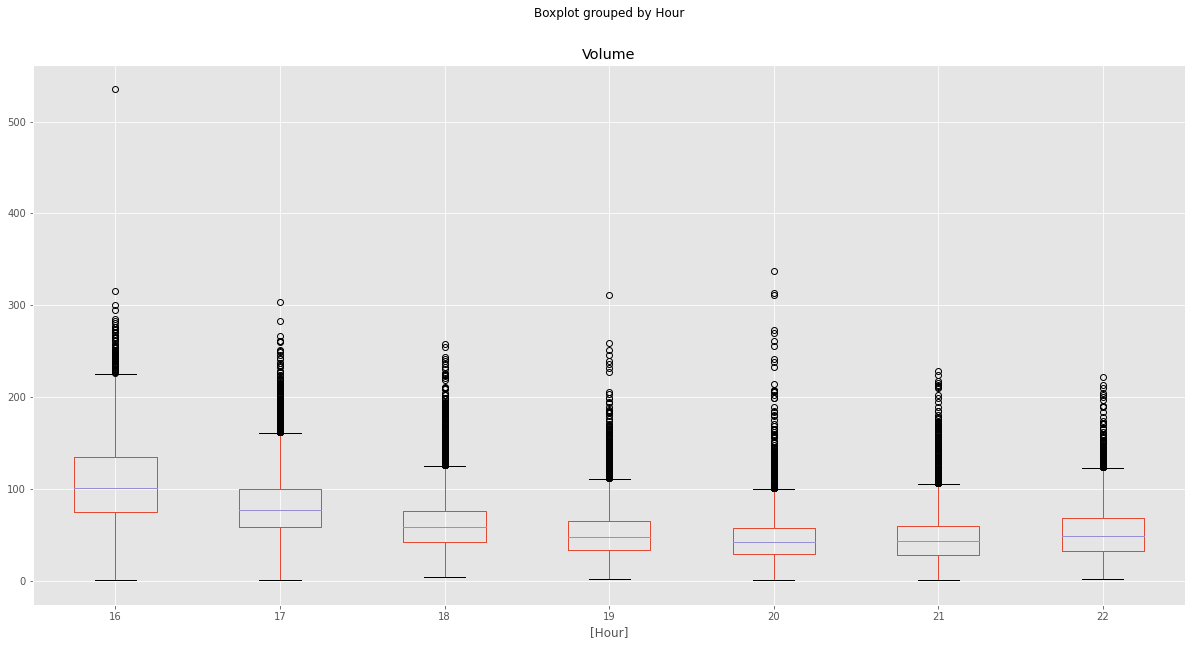

In [15]:
# # Diagrama de caja y bigotes del volumen por hora

datos_twitter['Hour'] = datos_twitter.index.hour.astype(str)
datos_twitter
datos_twitter.boxplot(column = ['Volume'], by = ['Hour'])
plt.show()

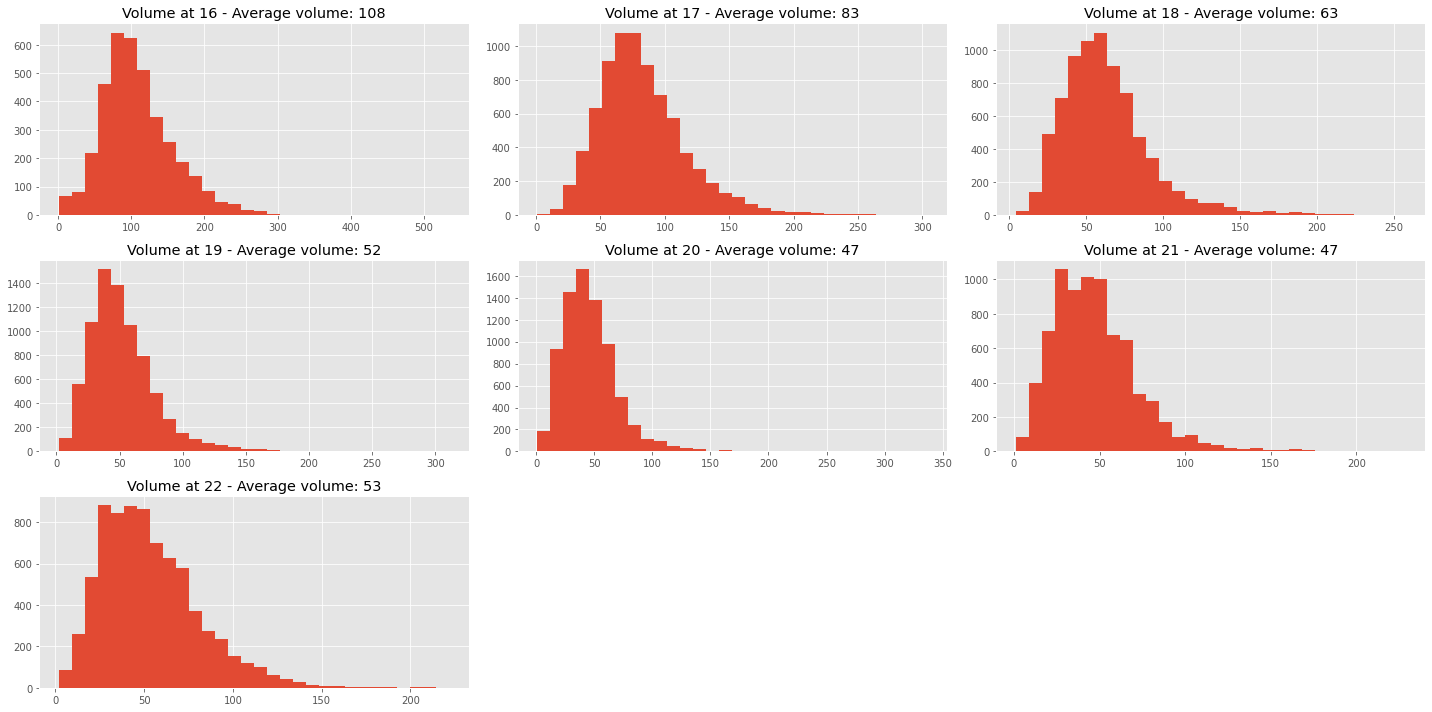

In [13]:
# Distribución del volumen por hora
fig, axs = plt.subplots(3, 3)
unicos = sorted(pd.unique(datos_twitter['Hour'].astype(int)))
for i in range(len(unicos)):

  axs.reshape(-1)[i].hist(datos_twitter['Volume'][datos_twitter['Hour'] == str(unicos[i])], bins = 30)
  axs.reshape(-1)[i].set_title('Volume at ' + str(unicos[i]) + ' - Average volume: ' + 
                               str(round(datos_twitter['Volume'][datos_twitter['Hour'] == str(unicos[i])].mean())))
  axs.reshape(-1)[i].grid(True)

fig.delaxes(axs[2,2])
fig.delaxes(axs[2,1])
fig.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


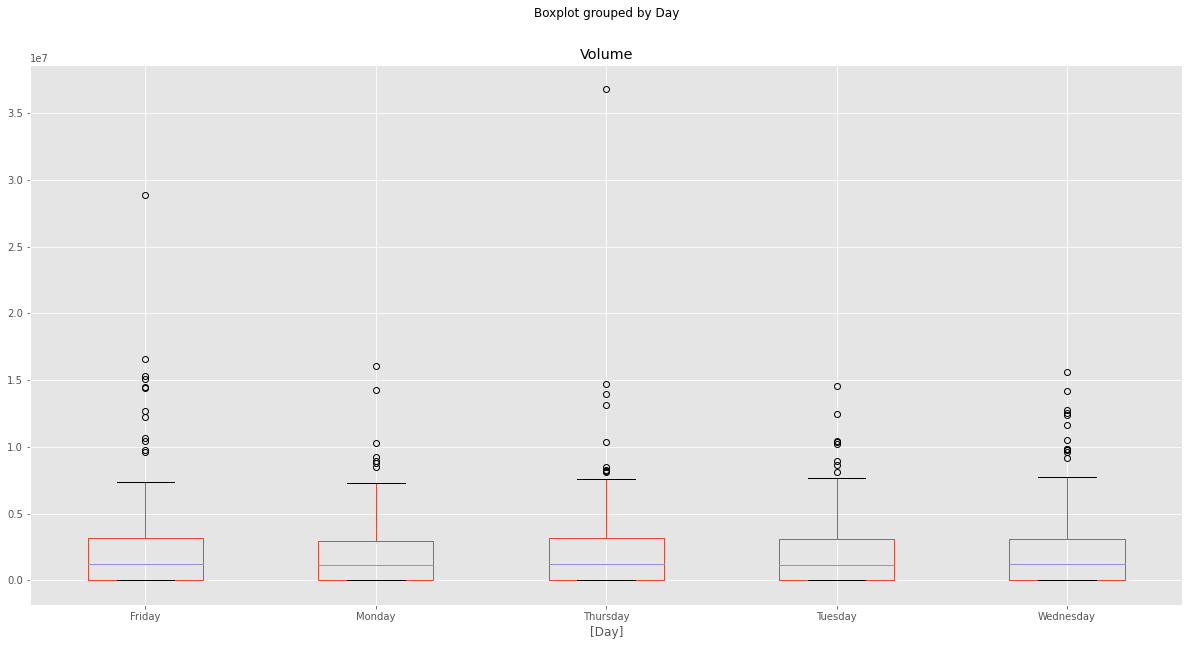

In [14]:
# Diagrama de caja y bigotes del volumen por día

datos_twitter_D1 = pd.read_csv('https://raw.githubusercontent.com/andresem/SemilleroTrading-2021-1/main/datos/TWITTER_DAY.csv?token=AK2FU74MCEU6OZVBYVUTNBLA4KOVY', index_col=0) 
datos_twitter_D1.index = pd.to_datetime(datos_twitter_D1.index)

datos_twitter_D1['Day'] = datos_twitter_D1.index.day_name()
datos_twitter_D1 = datos_twitter_D1[datos_twitter_D1['Day'] != 'Saturday']
datos_twitter_D1.boxplot(column = ['Volume'], by = ['Day'])
plt.show()


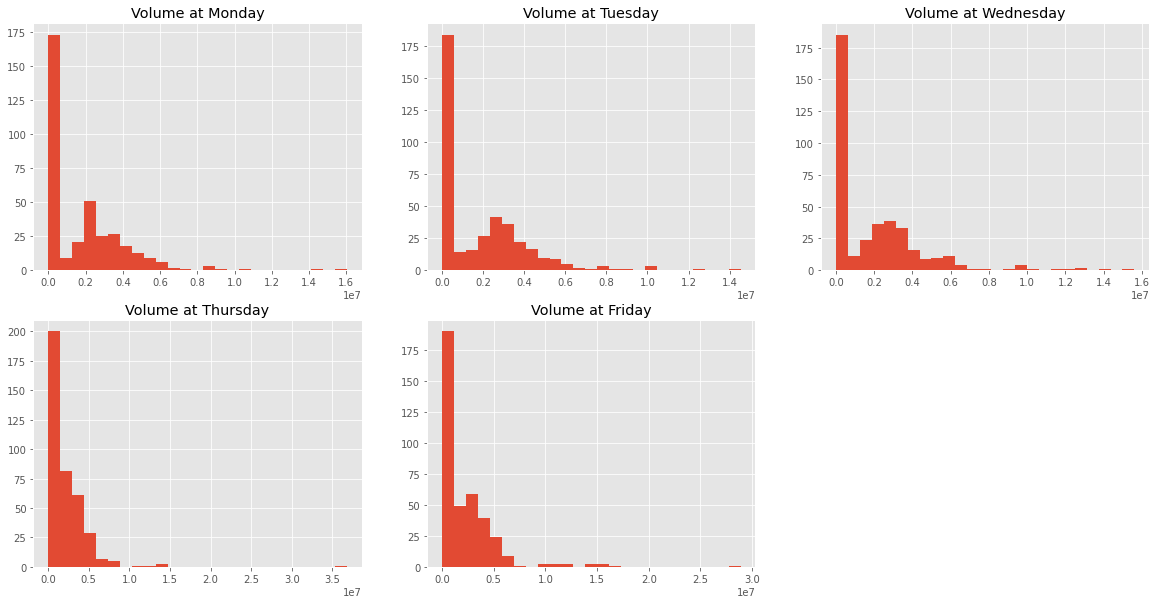

In [12]:
# Distribución del volumen por día
fig, axs = plt.subplots(2, 3)
datos_twitter_D1['Day']
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for i in range(len(dias)):

  axs.reshape(-1)[i].hist(datos_twitter_D1['Volume'][datos_twitter_D1['Day'] == dias[i]], bins = 25)
  axs.reshape(-1)[i].set_title('Volume at ' + dias[i])
  axs.reshape(-1)[i].grid(True)

fig.delaxes(axs[1,2])
plt.show()